In [ ]:

# Step 2: Upload the kaggle.json file (This will prompt you to choose your file)
from google.colab import files
files.upload()

# Step 3: Move kaggle.json to the proper directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Step 4: Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Step 5: Download the dataset
# This is the specific dataset URL and ID you provided from Kaggle
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

# Step 6: Unzip the downloaded dataset
!unzip ham1000-segmentation-and-classification.zip -d ./ham1000_data

Streaming output truncated to the last 5000 lines.
  inflating: ./ham1000_data/masks/ISIC_0029321_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029322_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029323_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029324_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029325_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029326_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029327_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029328_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029329_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029330_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029331_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029332_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029333_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029334_segmentation.png  
  inflating: ./ham1000_da

In [ ]:



# Verify the contents
import os
os.listdir('./ham1000_data')


['masks', 'images', 'GroundTruth.csv']

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import shutil

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:


# Load the ground truth data
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Define paths
source_folder = '/content/ham1000_data/images'
destination_folder = '/content/ham1000_data/classified_images'

# Create destination folders for each class
classes = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
for class_name in classes:
    os.makedirs(os.path.join(destination_folder, class_name), exist_ok=True)

# Iterate over each row in the dataframe and move files based on class labels
for index, row in df.iterrows():
    # Get image name and class labels
    image_name = row['image'] + '.jpg'
    image_path = os.path.join(source_folder, image_name)

    # Move image to the corresponding class folder based on label
    for class_name in classes:
        if row[class_name] == 1.0:  # If the label is 1 for the class
            dest_path = os.path.join(destination_folder, class_name, image_name)
            shutil.copy(image_path, dest_path)  # Copy image to the respective folder

print("Images have been separated into respective class folders.")


Images have been separated into respective class folders.


<ipython-input-8-c294a97a9841>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=class_counts_df, palette="viridis")


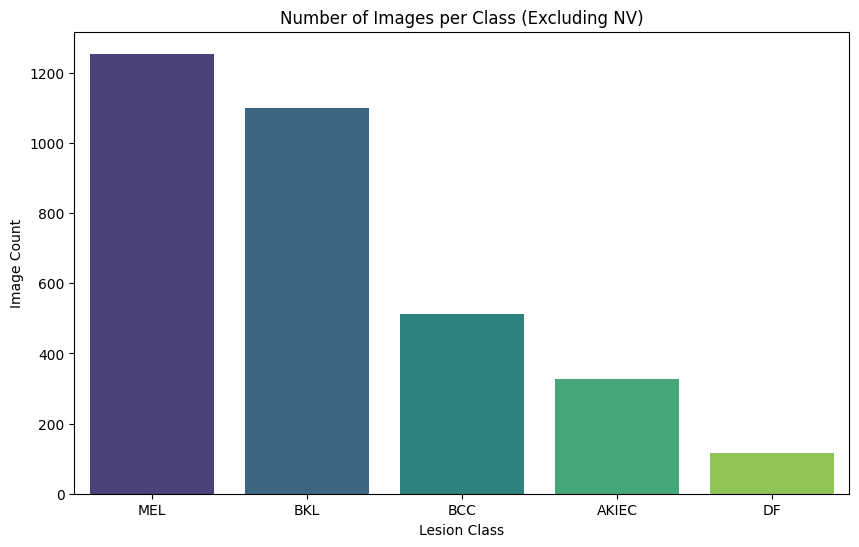

In [ ]:

# Load the ground truth data
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Drop the 'nv' class by filtering out its rows
df['class'] = df.iloc[:, 1:-1].idxmax(axis=1)  # Add 'class' column for the target label
df_filtered = df[df['class'] != 'NV']  # Remove rows where 'class' is 'nv'

# Count the number of images per class
class_counts = df_filtered['class'].value_counts()  # Count the number of occurrences for each class

# Convert to DataFrame for easier plotting
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Image Count']

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Image Count', data=class_counts_df, palette="viridis")
plt.title('Number of Images per Class (Excluding NV)')
plt.xlabel('Lesion Class')
plt.ylabel('Image Count')
plt.show()


In [ ]:
class_counts

,count
class,
MEL,1255
BKL,1099
BCC,514
AKIEC,327
DF,115


In [ ]:
# Load ground truth CSV
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Add column 'class' for the target label
df['class'] = df.iloc[:, 1:].idxmax(axis=1)
# Step 4: Filter out rows where the class is "nv" (assuming the class column contains 'nv' for Nevi)
df = df[df['class'] != 'NV']
# Split into train and test data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)


In [ ]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,class
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKL
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
12,ISIC_0024318,0.0,0.0,0.0,0.0,0.0,1.0,0.0,DF
...,...,...,...,...,...,...,...,...,...
10007,ISIC_0034313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
10009,ISIC_0034315,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKL
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3310 entries, 4 to 10012
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   3310 non-null   object 
 1   MEL     3310 non-null   float64
 2   NV      3310 non-null   float64
 3   BCC     3310 non-null   float64
 4   AKIEC   3310 non-null   float64
 5   BKL     3310 non-null   float64
 6   DF      3310 non-null   float64
 7   VASC    3310 non-null   float64
 8   class   3310 non-null   object 
dtypes: float64(7), object(2)
memory usage: 258.6+ KB


In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import ResNet50, EfficientNetB0, VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg


# **Select three Classes**

In [ ]:


# Define dataset directory
dataset_path = "/content/ham1000_data/classified_images"
filtered_dataset_path = "/content/ham1000_data/classified_images_filtered"
# List of classes to exclude
excluded_classes = ["VASC", "DF", "BCC",'AKIEC']

# Create a filtered dataset directory without 'NV'
if not os.path.exists(filtered_dataset_path):
    os.makedirs(filtered_dataset_path)
    for class_name in os.listdir(dataset_path):
        if class_name not in excluded_classes:
            source_dir = os.path.join(dataset_path, class_name)
            target_dir = os.path.join(filtered_dataset_path, class_name)
            shutil.copytree(source_dir, target_dir)


# **Data Prepration**


In [ ]:

# Parameters
img_height, img_width = 224, 224  # Resize images
batch_size = 32
epochs = 20

# Load filtered dataset
train_dataset = image_dataset_from_directory(
    filtered_dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    filtered_dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Define class names
class_names = train_dataset.class_names
print("Filtered Classes:", class_names)


Found 8917 files belonging to 3 classes.
Using 7134 files for training.
Found 8917 files belonging to 3 classes.
Using 1783 files for validation.
Filtered Classes: ['BKL', 'MEL', 'NV']


# **Funtion Define for Model Struture**

In [ ]:


# Function to train and compute confusion matrix
def train_pretrained_model(base_model, preprocess_fn, train_dataset, val_dataset, class_names, epochs=10, fine_tune_epochs=10):
    # Preprocess datasets
    train_ds = train_dataset.map(lambda x, y: (preprocess_fn(x), y))
    val_ds = val_dataset.map(lambda x, y: (preprocess_fn(x), y))

    # Prefetch datasets
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

    # Freeze base model initially
    base_model.trainable = False

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print(f"\nTraining with {base_model.name} (frozen)...")
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    # Fine-tune the model
    base_model.trainable = True
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nFine-tuning with {base_model.name}...")
    fine_tune_history = model.fit(train_ds, validation_data=val_ds, epochs=fine_tune_epochs)

    # Merge history objects
    for key in fine_tune_history.history.keys():
        history.history[key].extend(fine_tune_history.history[key])

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(val_ds)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    # Generate predictions and compute confusion matrix
    y_true, y_pred = [], []
    for images, labels in val_ds:
        predictions = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(predictions, axis=1))

    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {base_model.name}:")
    print(conf_matrix)

    # Classification Report
    print(f"\nClassification Report for {base_model.name}:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return history, conf_matrix, base_model.name


# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """
    Plots training and validation accuracy and loss from the model's history.

    Args:
        history: The history object returned by model.fit().
        model_name: Name of the model, used for the plot title.
    """
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:

# Define models and preprocess functions
models_to_train = {
    "ResNet50": (ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_resnet),
    "EfficientNetB0": (EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_efficientnet),
    "VGG16": (VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_vgg)
}


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Model Evalution**


Training with resnet50 (frozen)...
Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 109s 380ms/step - accuracy: 0.7444 - loss: 0.9051 - val_accuracy: 0.8054 - val_loss: 0.4733
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 72s 322ms/step - accuracy: 0.8056 - loss: 0.4727 - val_accuracy: 0.8216 - val_loss: 0.4579
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 78s 349ms/step - accuracy: 0.8219 - loss: 0.4400 - val_accuracy: 0.8222 - val_loss: 0.4348
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 342ms/step - accuracy: 0.8306 - loss: 0.4122 - val_accuracy: 0.8312 - val_loss: 0.4334
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 75s 312ms/step - accuracy: 0.8418 - loss: 0.3982 - val_accuracy: 0.8273 - val_loss: 0.4176
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 308ms/step - accuracy: 0.8508 - loss: 0.3774 - val_accuracy: 0.8357 - val_loss: 0.4206
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 83s 315ms/step - accuracy: 0.8541 - loss: 0.3630 - val_accuracy: 0.8390 - val_loss: 0.3988
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 88s 34

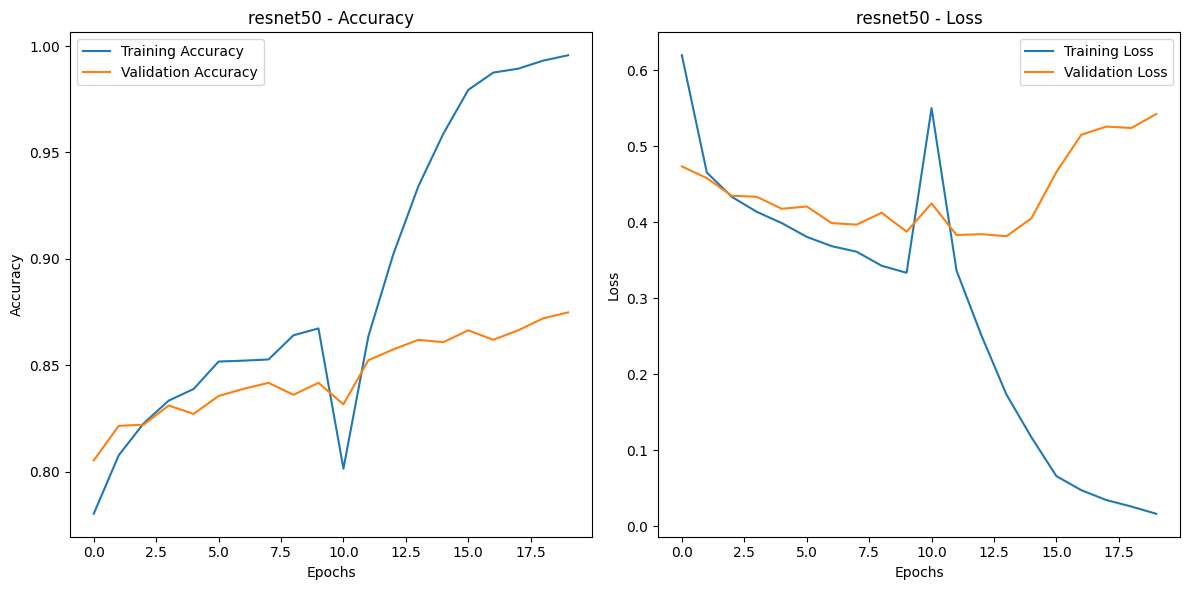

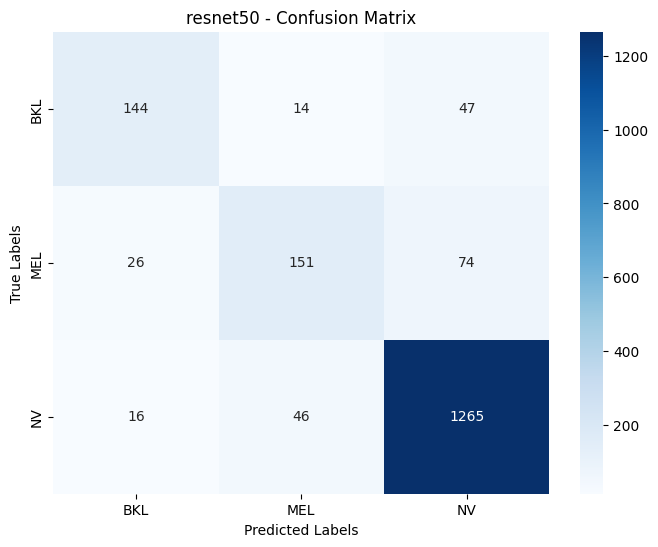


Training with efficientnetb0 (frozen)...
Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 107s 361ms/step - accuracy: 0.7542 - loss: 0.6637 - val_accuracy: 0.7897 - val_loss: 0.4849
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 97s 231ms/step - accuracy: 0.8025 - loss: 0.4882 - val_accuracy: 0.8104 - val_loss: 0.4580
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 80s 223ms/step - accuracy: 0.8069 - loss: 0.4679 - val_accuracy: 0.8116 - val_loss: 0.4654
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 94s 277ms/step - accuracy: 0.8084 - loss: 0.4565 - val_accuracy: 0.8239 - val_loss: 0.4456
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 50s 226ms/step - accuracy: 0.8316 - loss: 0.4266 - val_accuracy: 0.8082 - val_loss: 0.4538
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 94s 279ms/step - accuracy: 0.8335 - loss: 0.4323 - val_accuracy: 0.8278 - val_loss: 0.4370
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 73s 236ms/step - accuracy: 0.8388 - loss: 0.4058 - val_accuracy: 0.8306 - val_loss: 0.4229
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 

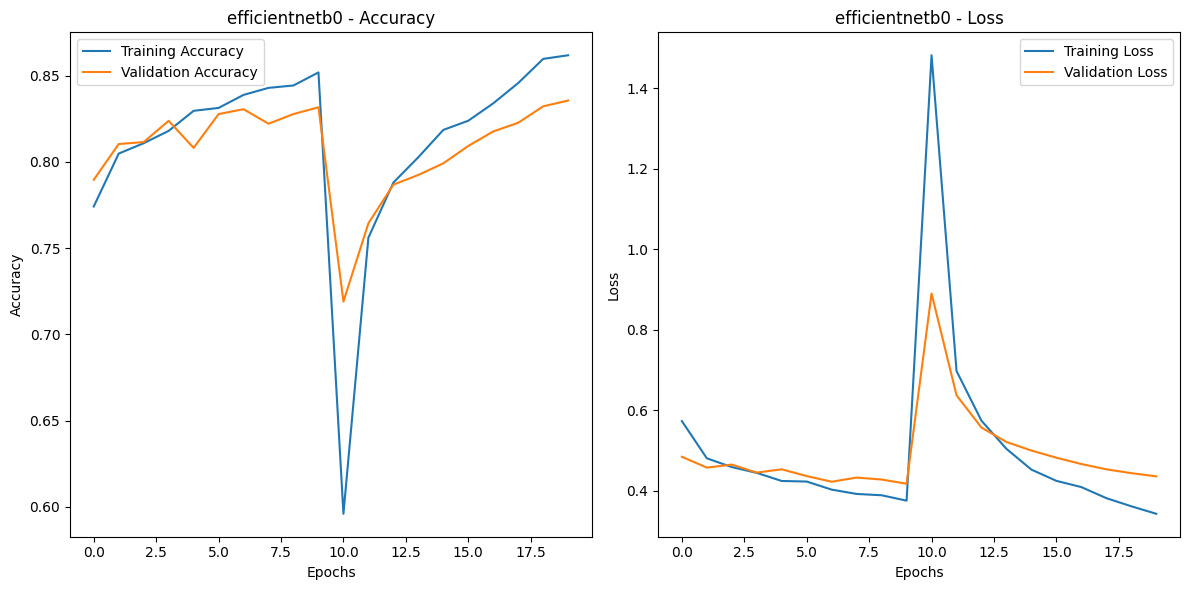

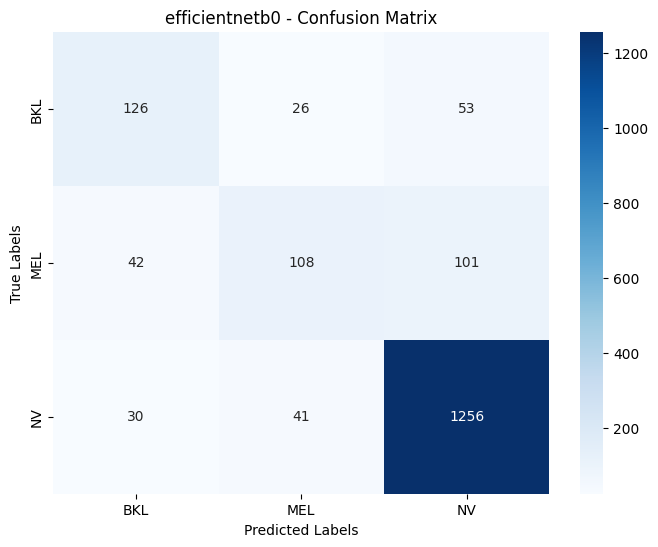


Training with vgg16 (frozen)...
Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 115s 441ms/step - accuracy: 0.7081 - loss: 1.1620 - val_accuracy: 0.7835 - val_loss: 0.5256
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 101s 322ms/step - accuracy: 0.7952 - loss: 0.5194 - val_accuracy: 0.7942 - val_loss: 0.5102
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 89s 354ms/step - accuracy: 0.8059 - loss: 0.4726 - val_accuracy: 0.8059 - val_loss: 0.4813
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 75s 323ms/step - accuracy: 0.8240 - loss: 0.4340 - val_accuracy: 0.8149 - val_loss: 0.4765
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 90s 361ms/step - accuracy: 0.8268 - loss: 0.4245 - val_accuracy: 0.8177 - val_loss: 0.4590
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 84s 369ms/step - accuracy: 0.8327 - loss: 0.4103 - val_accuracy: 0.8216 - val_loss: 0.4583
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 140s 362ms/step - accuracy: 0.8304 - loss: 0.4020 - val_accuracy: 0.8345 - val_loss: 0.4492
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 363

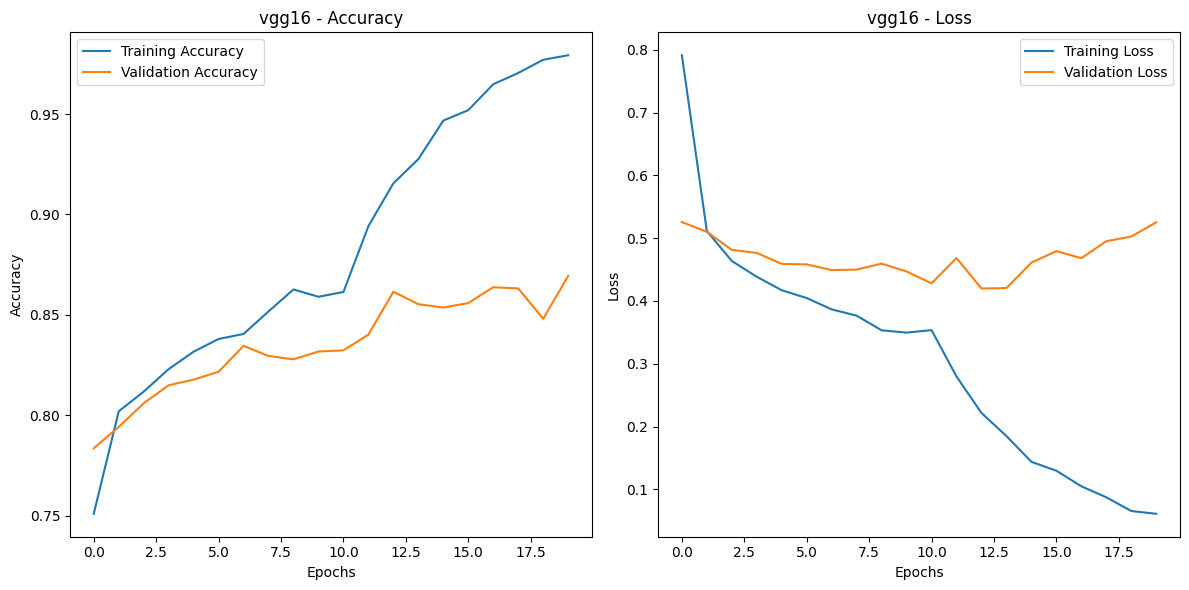

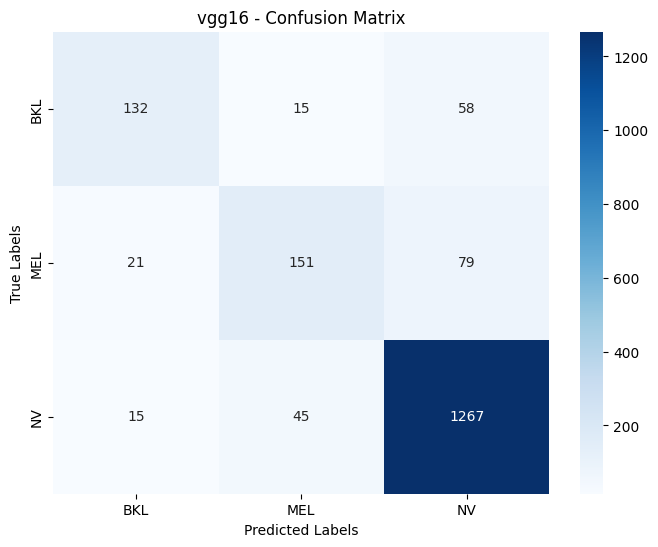

In [ ]:
# Train each model, plot history and confusion matrix
for model_name, (base_model, preprocess_fn) in models_to_train.items():
    history, conf_matrix, trained_model_name = train_pretrained_model(
        base_model, preprocess_fn, train_dataset, val_dataset, train_dataset.class_names
    )
    # Plot accuracy and loss history
    plot_history(history, trained_model_name)
    # Plot confusion matrix
    plot_confusion_matrix(conf_matrix, train_dataset.class_names, trained_model_name)


#  **Model Tune with Fine Tunning**



In [ ]:


def train_fine_tuned_model(base_model, preprocess_fn, train_dataset, val_dataset, class_names, epochs=20):
    import tensorflow as tf
    from tensorflow.keras import models, layers
    from sklearn.metrics import confusion_matrix, classification_report
    import numpy as np

    import tensorflow as tf

    # Assuming train_dataset and val_dataset return (images, labels)
    train_ds = train_dataset.map(lambda x, y: (x, tf.one_hot(y, depth=len(class_names))))
    val_ds = val_dataset.map(lambda x, y: (x, tf.one_hot(y, depth=len(class_names))))
    # Prefetch datasets
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

    # Set base model trainable
    base_model.trainable = True

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print(f"\nTraining and fine-tuning {base_model.name}...")
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(val_ds)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    # Generate predictions and compute confusion matrix
    y_true, y_pred = [], []
    for images, labels in val_ds:
        predictions = model.predict(images)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {base_model.name}:")
    print(conf_matrix)

    # Classification Report
    print(f"\nClassification Report for {base_model.name}:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return history, conf_matrix, base_model.name


# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


## **Model Evalution**


Training and fine-tuning resnet50...
Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 175s 488ms/step - accuracy: 0.6870 - loss: 0.7761 - val_accuracy: 0.7790 - val_loss: 0.5665
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 74s 331ms/step - accuracy: 0.8066 - loss: 0.4526 - val_accuracy: 0.8188 - val_loss: 0.4578
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 330ms/step - accuracy: 0.8561 - loss: 0.3571 - val_accuracy: 0.8334 - val_loss: 0.4185
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 83s 334ms/step - accuracy: 0.8970 - loss: 0.2666 - val_accuracy: 0.8407 - val_loss: 0.4139
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 334ms/step - accuracy: 0.9251 - loss: 0.1956 - val_accuracy: 0.8497 - val_loss: 0.4298
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 74s 331ms/step - accuracy: 0.9604 - loss: 0.1314 - val_accuracy: 0.8603 - val_loss: 0.4498
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 326ms/step - accuracy: 0.9746 - loss: 0.0883 - val_accuracy: 0.8615 - val_loss: 0.4401
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 75s 

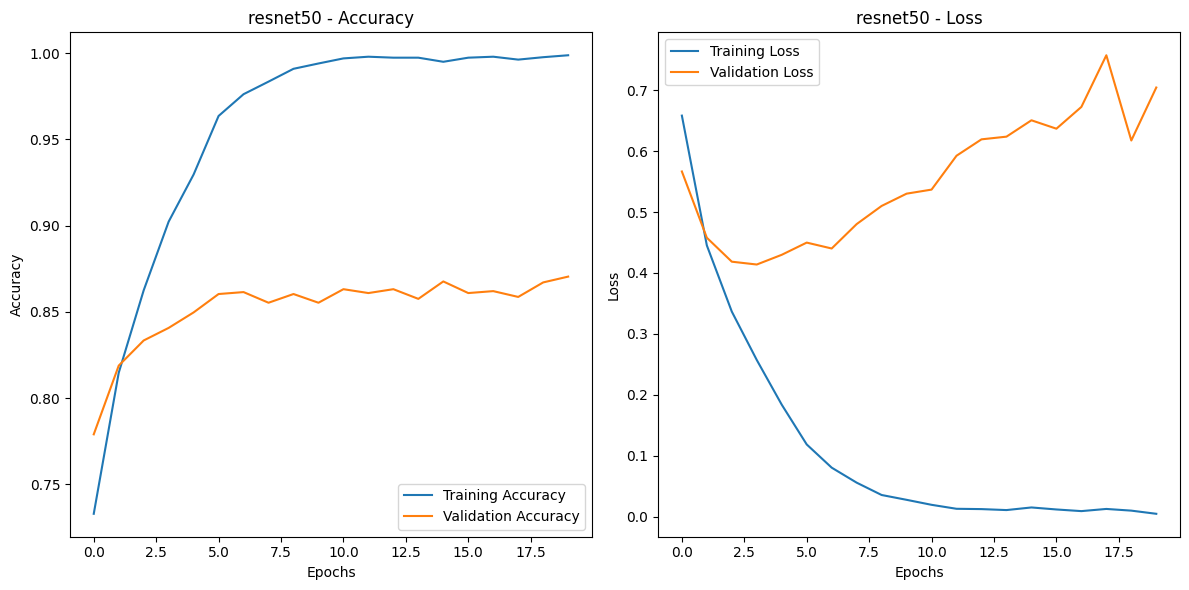

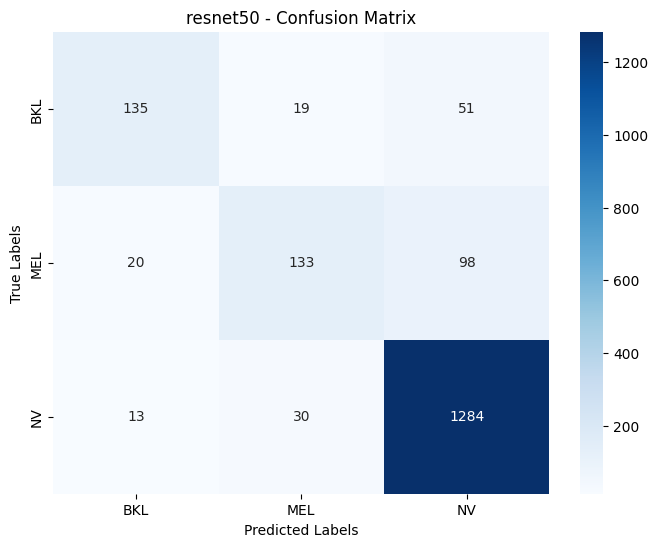


Training and fine-tuning efficientnetb0...
Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 193s 510ms/step - accuracy: 0.4938 - loss: 1.0065 - val_accuracy: 0.6887 - val_loss: 0.8200
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 93s 231ms/step - accuracy: 0.7525 - loss: 0.6350 - val_accuracy: 0.7667 - val_loss: 0.5628
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 52s 232ms/step - accuracy: 0.7924 - loss: 0.5285 - val_accuracy: 0.7970 - val_loss: 0.5031
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 229ms/step - accuracy: 0.7978 - loss: 0.4906 - val_accuracy: 0.8116 - val_loss: 0.4766
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 226ms/step - accuracy: 0.8208 - loss: 0.4488 - val_accuracy: 0.8222 - val_loss: 0.4562
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 83s 232ms/step - accuracy: 0.8308 - loss: 0.4270 - val_accuracy: 0.8329 - val_loss: 0.4401
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 52s 233ms/step - accuracy: 0.8354 - loss: 0.4043 - val_accuracy: 0.8390 - val_loss: 0.4268
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━

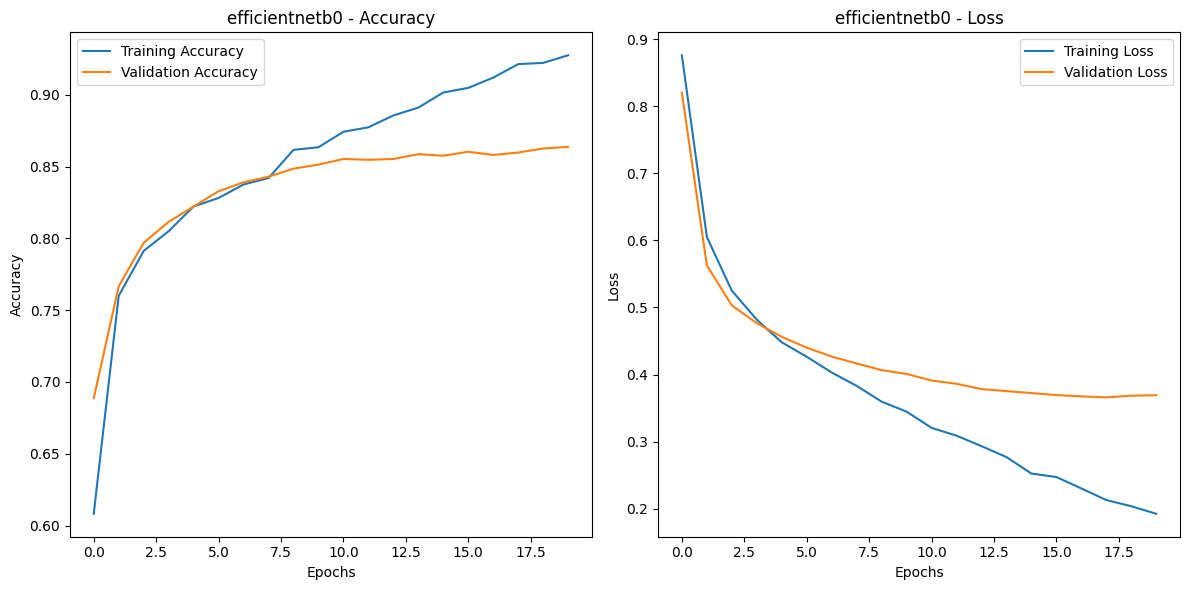

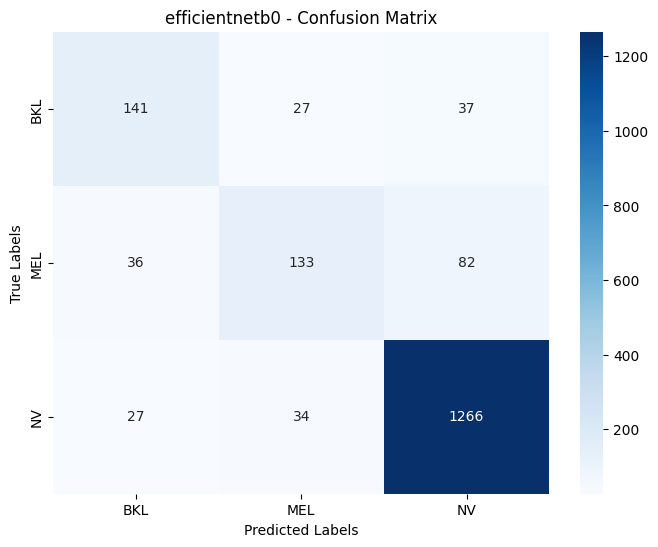


Training and fine-tuning vgg16...
Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 231s 839ms/step - accuracy: 0.6327 - loss: 1.2372 - val_accuracy: 0.7801 - val_loss: 0.5279
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 119s 533ms/step - accuracy: 0.7751 - loss: 0.5229 - val_accuracy: 0.7987 - val_loss: 0.5019
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 119s 532ms/step - accuracy: 0.8022 - loss: 0.4547 - val_accuracy: 0.8188 - val_loss: 0.4485
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 142s 534ms/step - accuracy: 0.8320 - loss: 0.4128 - val_accuracy: 0.8295 - val_loss: 0.4251
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 119s 533ms/step - accuracy: 0.8564 - loss: 0.3703 - val_accuracy: 0.8228 - val_loss: 0.4646
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 142s 534ms/step - accuracy: 0.8672 - loss: 0.3288 - val_accuracy: 0.8435 - val_loss: 0.4088
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 120s 540ms/step - accuracy: 0.8944 - loss: 0.2786 - val_accuracy: 0.8413 - val_loss: 0.4776
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1

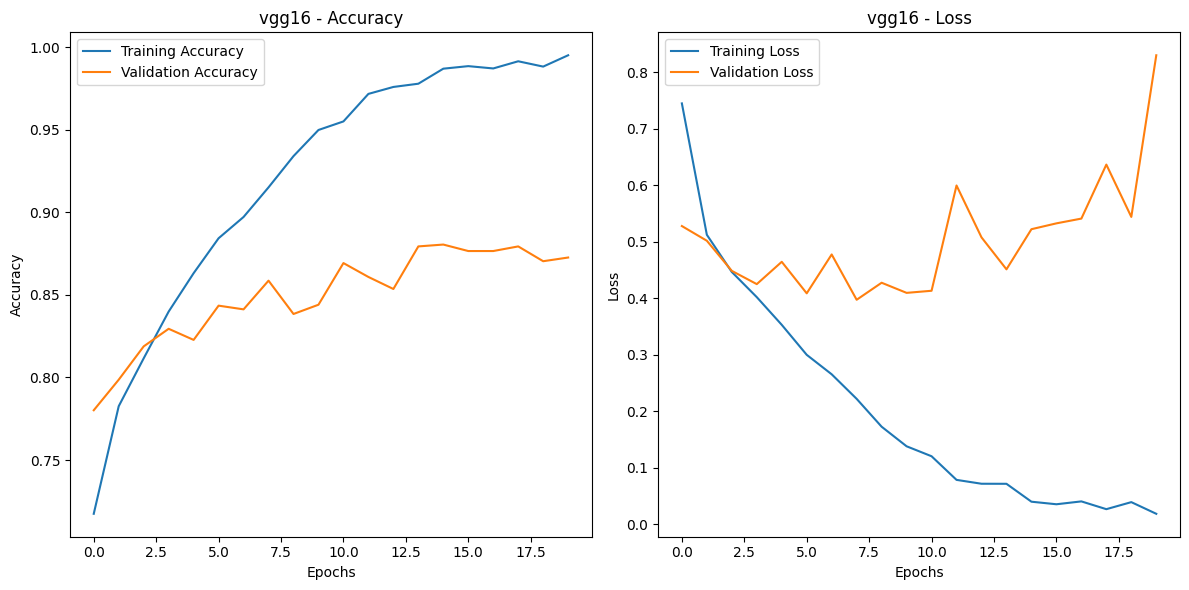

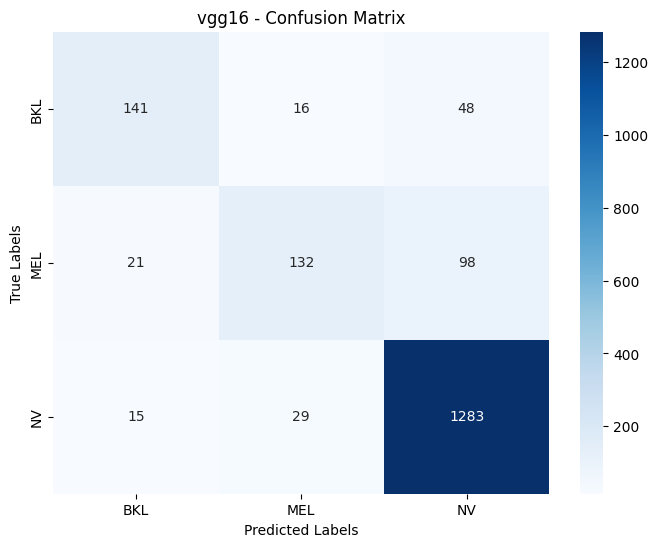

In [ ]:
# Train each model, plot history and confusion matrix
for model_name, (base_model, preprocess_fn) in models_to_train.items():
    history, conf_matrix, trained_model_name = train_fine_tuned_model(
        base_model, preprocess_fn, train_dataset, val_dataset, train_dataset.class_names
    )

    # Plot accuracy and loss history
    plot_history(history, trained_model_name)
    # Plot confusion matrix
    plot_confusion_matrix(conf_matrix, train_dataset.class_names, trained_model_name)


# **Effiecent model Trining with 30 epochi**

In [ ]:


# Define models and preprocess functions
models_to_train = {
    # "ResNet50": (ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_resnet),
    "EfficientNetB0": (EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_efficientnet),
    # "VGG16": (VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_vgg)
}


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Model Evalution**


Training and fine-tuning efficientnetb0...
Epoch 1/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 204s 525ms/step - accuracy: 0.5346 - loss: 0.9702 - val_accuracy: 0.7022 - val_loss: 0.8024
Epoch 2/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 101s 296ms/step - accuracy: 0.7711 - loss: 0.6109 - val_accuracy: 0.7757 - val_loss: 0.5652
Epoch 3/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.7933 - loss: 0.5166 - val_accuracy: 0.7958 - val_loss: 0.5087
Epoch 4/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 253ms/step - accuracy: 0.8094 - loss: 0.4798 - val_accuracy: 0.8071 - val_loss: 0.4799
Epoch 5/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - accuracy: 0.8250 - loss: 0.4354 - val_accuracy: 0.8177 - val_loss: 0.4593
Epoch 6/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 90s 289ms/step - accuracy: 0.8332 - loss: 0.4116 - val_accuracy: 0.8261 - val_loss: 0.4441
Epoch 7/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 56s 252ms/step - accuracy: 0.8427 - loss: 0.3841 - val_accuracy: 0.8345 - val_loss: 0.4312
Epoch 8/30
223/223 ━━━━━━━━━━━━━━━━━━

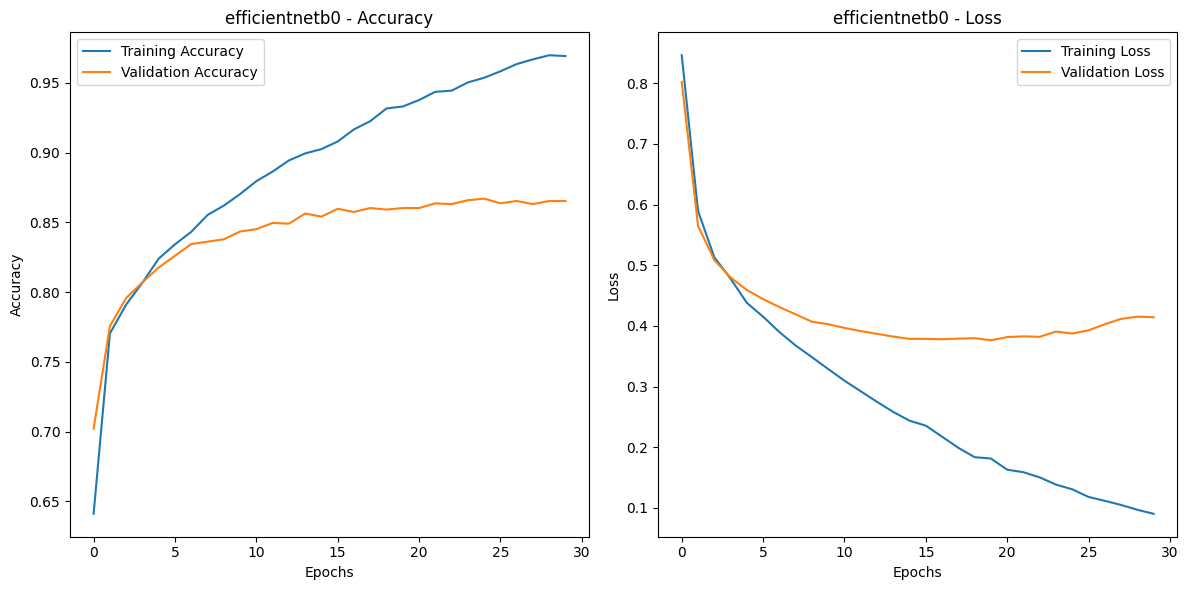

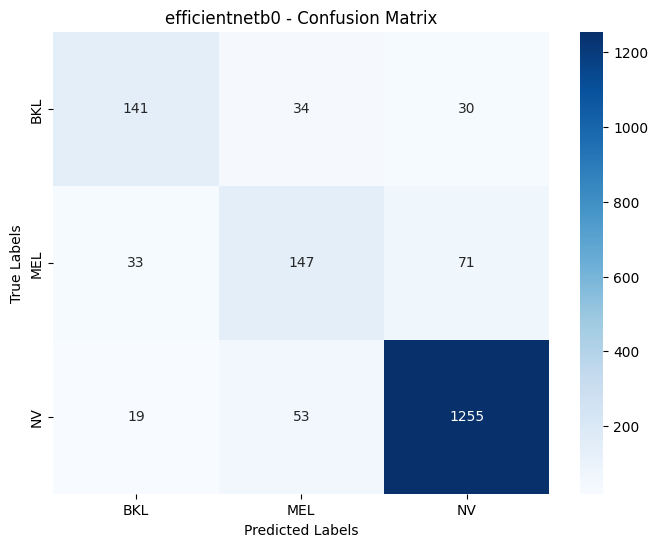

In [ ]:
# Train each model, plot history and confusion matrix
for model_name, (base_model, preprocess_fn) in models_to_train.items():
    history, conf_matrix, trained_model_name = train_fine_tuned_model(
        base_model, preprocess_fn, train_dataset, val_dataset,train_dataset.class_names,epochs=30
    )

    # Plot accuracy and loss history
    plot_history(history, trained_model_name)
    # Plot confusion matrix
    plot_confusion_matrix(conf_matrix, train_dataset.class_names, trained_model_name)
